### ONEWAY ANOVA

In [1]:
import pandas as pd
 
d = pd.read_csv('onewayanova.txt',sep="\t")

d.head()

,A,B,C,D
0,25,45,30,54
1,30,55,29,60
2,28,29,33,51
3,36,56,37,62
4,29,40,27,73


<AxesSubplot:>

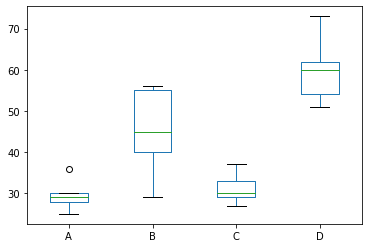

In [2]:
d.boxplot(column=['A','B','C','D'],grid=False)

In [3]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


d_melt = pd.melt(d.reset_index(),
                id_vars=['index'],
                value_vars=['A','B','C','D'])

d_melt.columns = ['index','treatments','value']

d_melt

,index,treatments,value
0,0,A,25
1,1,A,30
2,2,A,28
3,3,A,36
4,4,A,29
5,0,B,45
6,1,B,55
7,2,B,29
8,3,B,56
9,4,B,40


In [4]:
model = ols('value~C(treatments)',data=d_melt).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     17.49
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           2.64e-05
Time:                        11:54:33   Log-Likelihood:                -66.643
No. Observations:                  20   AIC:                             141.3
Df Residuals:                      16   BIC:                             145.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             29.6000      3.387      8.738      0.000      22.419      36.781
C(treatments)[T.B]    15.4000      4.791      3.215      0.005       5.244      25.556
C(treatments)[T.C]     1.6000      4.791      0.334      0.743      -8.556      11.756
C(treatments)[T.D]    30.4000      4.791      6.346      0.000      20.244      40.556
==============================================================================
Omnibus:                        0.549   Durbin-Watson:                   2.629
Prob(Omnibus):                  0.760   Jarque-Bera (JB):                0.020
Skew:                          -0.057   Prob(JB):                        0.990
Kurtosis:                       3.105   Cond. No.                         4.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
anova_table = sm.stats.anova_lm(model,typ=2)

print(anova_table)

                sum_sq    df         F    PR(>F)
C(treatments)  3010.95   3.0  17.49281  0.000026
Residual        918.00  16.0       NaN       NaN


In [6]:
esq_sm = anova_table['sum_sq'][0] / (anova_table['sum_sq'][0]+anova_table['sum_sq'][1])

anova_table['EtaSq'] = [esq_sm,'NaN']

print(anova_table)

                sum_sq    df         F    PR(>F)    EtaSq
C(treatments)  3010.95   3.0  17.49281  0.000026  0.76635
Residual        918.00  16.0       NaN       NaN      NaN


In [7]:
pair_t = model.t_test_pairwise('C(treatments)')

pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
B-A,15.4,4.790616,3.214618,0.005409,5.244348,25.555652,0.021461,True
C-A,1.6,4.790616,0.333986,0.742727,-8.555652,11.755652,0.742727,False
D-A,30.4,4.790616,6.345739,0.000010,20.244348,40.555652,0.000058,True
C-B,-13.8,4.790616,-2.880632,0.010869,-23.955652,-3.644348,0.021620,True
D-B,15.0,4.790616,3.131121,0.006445,4.844348,25.155652,0.021461,True
D-C,28.8,4.790616,6.011753,0.000018,18.644348,38.955652,0.000091,True


In [8]:
mc = sm.stats.multicomp.MultiComparison(d_melt['value'],d_melt['treatments'])

mc_results =  mc.tukeyhsd()

print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     15.4 0.0251   1.694 29.106   True
     A      C      1.6 0.9867 -12.106 15.306  False
     A      D     30.4 0.0001  16.694 44.106   True
     B      C    -13.8 0.0482 -27.506 -0.094   True
     B      D     15.0 0.0296   1.294 28.706   True
     C      D     28.8 0.0001  15.094 42.506   True
---------------------------------------------------


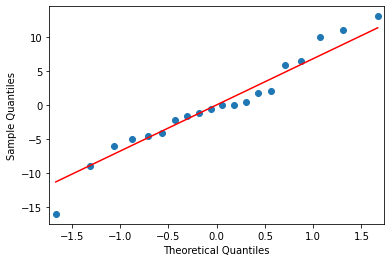

In [9]:
res = model.resid

fig = sm.qqplot(res,line='s')

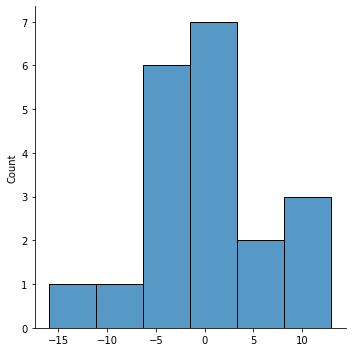

In [10]:
import seaborn as sns

sns.displot(res,bins='auto',kind='hist')

In [11]:
from scipy import stats

w,p_value = stats.shapiro(model.resid)

print(p_value)

0.7229772806167603


In [12]:
w,p_value = stats.bartlett(d_melt['value'][d_melt['treatments']=='A'],
                          d_melt['value'][d_melt['treatments']=='B'],
                          d_melt['value'][d_melt['treatments']=='C'],
                          d_melt['value'][d_melt['treatments']=='D'])
print('Barlett\'s test:\tw:{:7.4f},p_value:{:7.4f}'.format(w,p_value))

w,p_value = stats.levene(d['A'],d['B'],d['C'],d['D'])

print('Levene\'s test:\tw:{:7.4f},p_value:{:7.4f}'.format(w,p_value))

Barlett's test:	w: 5.6878,p_value: 0.1278
Levene's test:	w: 1.9220,p_value: 0.1667


### TWO WAY ANOVA

In [13]:
import pandas as pd

d = pd.read_csv('twowayanova.txt',sep="\t")

d

,Genotype,1_year,2_year,3_year
0,A,1.53,4.08,6.69
1,A,1.83,3.84,5.97
2,A,1.38,3.96,6.33
3,B,3.60,5.70,8.55
4,B,2.94,5.07,7.95
5,B,4.02,7.20,8.94
6,C,3.99,6.09,10.02
7,C,3.30,5.88,9.63
8,C,4.41,6.51,10.38
9,D,3.75,5.19,11.40


In [14]:
d_melt = pd.melt(d,id_vars=['Genotype'],
                value_vars=['1_year','2_year','3_year'])

d_melt.columns = ['Genotype','years','value']

d_melt.head()

,Genotype,years,value
0,A,1_year,1.53
1,A,1_year,1.83
2,A,1_year,1.38
3,B,1_year,3.60
4,B,1_year,2.94


<AxesSubplot:xlabel='Genotype', ylabel='value'>

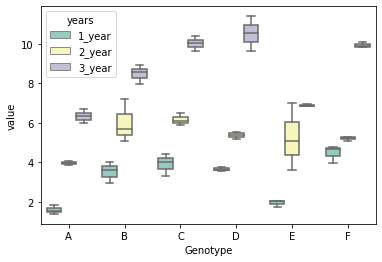

In [15]:
import seaborn as sns

sns.boxplot(x='Genotype',y='value',hue='years',data=d_melt,palette='Set3')

In [16]:
model = ols('value ~ C(Genotype)+C(years)+C(Genotype):C(years)',data=d_melt).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     58.33
Date:                Mon, 14 Nov 2022   Prob (F-statistic):           4.29e-21
Time:                        11:54:35   Log-Likelihood:                -37.909
No. Observations:                  54   AIC:                             111.8
Df Residuals:                      36   BIC:                             147.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               1.5800      0.345      4.576      0.000       0.880       2.280
C(Genotype)[T.B]                        1.9400      0.488      3.973      0.000       0.950       2.930
C(Genotype)[T.C]                        2.3200      0.488      4.752      0.000       1.330       3.310
C(Genotype)[T.D]                        2.0700      0.488      4.240      0.000       1.080       3.060
C(Genotype)[T.E]                        0.3400      0.488      0.696      0.491      -0.650       1.330
C(Genotype)[T.F]                        2.8800      0.488      5.899      0.000       1.890       3.870
C(years)[T.2_year]                      2.3800      0.488      4.875      0.000       1.390       3.370
C(years)[T.3_year]                      4.7500      0.488      9.729      0.000       3.760       5.740
C(Genotype)[T.B]:C(years)[T.2_year]     0.0900      0.690      0.130      0.897      -1.310       1.490
C(Genotype)[T.C]:C(years)[T.2_year]    -0.1200      0.690     -0.174      0.863      -1.520       1.280
C(Genotype)[T.D]:C(years)[T.2_year]    -0.6600      0.690     -0.956      0.346      -2.060       0.740
C(Genotype)[T.E]:C(years)[T.2_year]     0.9300      0.690      1.347      0.186      -0.470       2.330
C(Genotype)[T.F]:C(years)[T.2_year]    -1.6400      0.690     -2.375      0.023      -3.040      -0.240
C(Genotype)[T.B]:C(years)[T.3_year]     0.2100      0.690      0.304      0.763      -1.190       1.610
C(Genotype)[T.C]:C(years)[T.3_year]     1.3600      0.690      1.970      0.057      -0.040       2.760
C(Genotype)[T.D]:C(years)[T.3_year]     2.1300      0.690      3.085      0.004       0.730       3.530
C(Genotype)[T.E]:C(years)[T.3_year]     0.2100      0.690      0.304      0.763      -1.190       1.610
C(Genotype)[T.F]:C(years)[T.3_year]     0.7200      0.690      1.043      0.304      -0.680       2.120
==============================================================================
Omnibus:                       12.225   Durbin-Watson:                   2.488
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               35.941
Skew:                           0.289   Prob(JB):                     1.57e-08
Kurtosis:                       6.955   Cond. No.                         25.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
anova_table = sm.stats.anova_lm(model,typ=2)
print(anova_table)

                          sum_sq    df           F        PR(>F)
C(Genotype)            58.551733   5.0   32.748581  1.931655e-12
C(years)              278.925633   2.0  390.014868  4.006243e-25
C(Genotype):C(years)   17.122967  10.0    4.788525  2.230094e-04
Residual               12.873000  36.0         NaN           NaN


In [18]:
pair_t = model.t_test_pairwise('C(years)')

pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
2_year-1_year,2.38,0.488251,4.874544,2.203053e-05,1.389781,3.370219,4.406058e-05,True
3_year-1_year,4.75,0.488251,9.728606,1.288991e-11,3.759781,5.740219,3.866973e-11,True
3_year-2_year,2.37,0.488251,4.854062,2.344832e-05,1.379781,3.360219,4.406058e-05,True


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
1_year 2_year   2.1467   0.0 1.0864 3.2069   True
1_year 3_year   5.5217   0.0 4.4614 6.5819   True
2_year 3_year    3.375   0.0 2.3147 4.4353   True
-------------------------------------------------


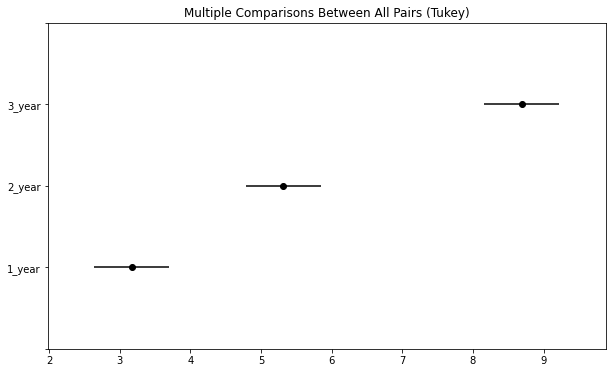

In [19]:
tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=d_melt['value'],
                                            groups=d_melt['years'],
                                            alpha=0.05)
tukey.plot_simultaneous()

print(tukey.summary())

In [20]:
pair_t = model.t_test_pairwise('C(Genotype)')

pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
B-A,1.94,0.488251,3.973367,3.258305e-04,0.949781,2.930219,0.003254,True
C-A,2.32,0.488251,4.751656,3.201071e-05,1.329781,3.310219,0.000416,True
D-A,2.07,0.488251,4.239624,1.489505e-04,1.079781,3.060219,0.001786,True
E-A,0.34,0.488251,0.696363,4.906733e-01,-0.650219,1.330219,0.902694,False
F-A,2.88,0.488251,5.898607,9.493591e-07,1.889781,3.870219,0.000014,True
C-B,0.38,0.488251,0.778288,4.414846e-01,-0.610219,1.370219,0.902694,False
D-B,0.13,0.488251,0.266257,7.915607e-01,-0.860219,1.120219,0.902694,False
E-B,-1.60,0.488251,-3.277004,2.327853e-03,-2.590219,-0.609781,0.018472,True
F-B,0.94,0.488251,1.925240,6.212807e-02,-0.050219,1.930219,0.361729,False
D-C,-0.25,0.488251,-0.512032,6.117557e-01,-1.240219,0.740219,0.902694,False


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
1_year 2_year   2.1467   0.0 1.0864 3.2069   True
1_year 3_year   5.5217   0.0 4.4614 6.5819   True
2_year 3_year    3.375   0.0 2.3147 4.4353   True
-------------------------------------------------


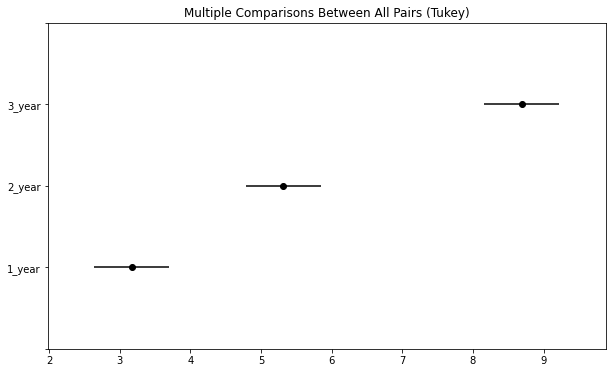

In [21]:
tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=d_melt['value'],
                                            groups=d_melt['years'],
                                            alpha=0.05)

tukey.plot_simultaneous()

print(tukey.summary())

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower    upper  reject
---------------------------------------------------------
A\1_year A\2_year     2.38 0.0024   0.5489  4.2111   True
A\1_year A\3_year     4.75    0.0   2.9189  6.5811   True
A\1_year B\1_year     1.94 0.0287   0.1089  3.7711   True
A\1_year B\2_year     4.41    0.0   2.5789  6.2411   True
A\1_year B\3_year      6.9    0.0   5.0689  8.7311   True
A\1_year C\1_year     2.32 0.0035   0.4889  4.1511   True
A\1_year C\2_year     4.58    0.0   2.7489  6.4111   True
A\1_year C\3_year     8.43    0.0   6.5989 10.2611   True
A\1_year D\1_year     2.07 0.0143   0.2389  3.9011   True
A\1_year D\2_year     3.79    0.0   1.9589  5.6211   True
A\1_year D\3_year     8.95    0.0   7.1189 10.7811   True
A\1_year E\1_year     0.34    1.0  -1.4911  2.1711  False
A\1_year E\2_year     3.65    0.0   1.8189  5.4811   True
A\1_year E\3_year      5.3    0.0   3.4689  7.1311   True
A\1_year F\1_y

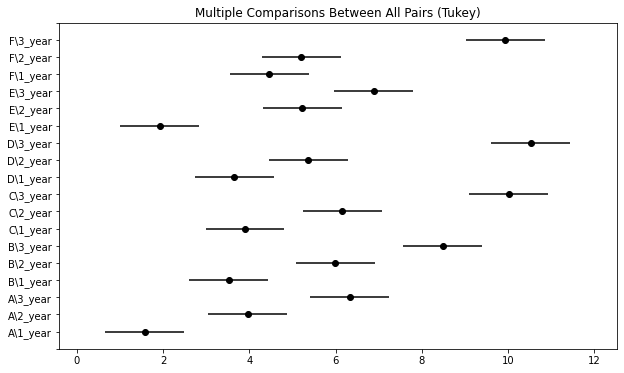

In [22]:
d_melt['comb1'] = d_melt.Genotype + "\\" + d_melt.years

tukey = sm.stats.multicomp.pairwise_tukeyhsd(endog=d_melt['value'],
                                            groups=d_melt['comb1'],
                                            alpha=0.05)

tukey.plot_simultaneous()

print(tukey.summary())

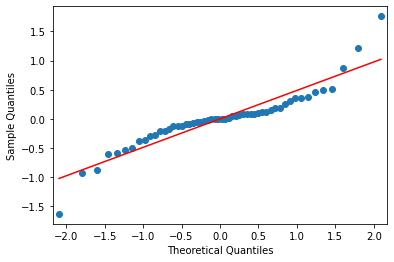

In [23]:
res = model.resid

fig = sm.qqplot(res,line='s')

In [24]:
w,p_value=stats.shapiro(model.resid)

print(p_value)

0.00023986827000044286


In [25]:
w,p_value = stats.bartlett(d['1_year'],d['2_year'],d['3_year'])
print('years-Barlett\'s test:\tw{:7.4f},pvalue={:7.4f}'.format(w,p_value))
w,p_value = stats.levene(d['1_year'],d['2_year'],d['3_year'])
print('years-Levene\'s test:\tw{:7.4f},pvalue={:7.4f}'.format(w,p_value))

w,p_value = stats.bartlett(d_melt['value'][d_melt['Genotype']=='A'],
                          d_melt['value'][d_melt['Genotype']=='B'],
                          d_melt['value'][d_melt['Genotype']=='C'],
                          d_melt['value'][d_melt['Genotype']=='D'],
                          d_melt['value'][d_melt['Genotype']=='E'],
                          d_melt['value'][d_melt['Genotype']=='F']
                         )
print('Genotype-Barlett\'s test:\tw:{:7.4f},p_value:{:7.4f}'.format(w,p_value))

w,p_value = stats.levene(d_melt['value'][d_melt['Genotype']=='A'],
                          d_melt['value'][d_melt['Genotype']=='B'],
                          d_melt['value'][d_melt['Genotype']=='C'],
                          d_melt['value'][d_melt['Genotype']=='D'],
                          d_melt['value'][d_melt['Genotype']=='E'],
                          d_melt['value'][d_melt['Genotype']=='F']
                         )
print('Genotype-Levene\'s test:\tw:{:7.4f},p_value:{:7.4f}'.format(w,p_value))

years-Barlett's test:	w 5.1882,pvalue= 0.0747
years-Levene's test:	w 3.7640,pvalue= 0.0299
Genotype-Barlett's test:	w: 1.7039,p_value: 0.8884
Genotype-Levene's test:	w: 0.2047,p_value: 0.9589


In [26]:
w,p_value = stats.bartlett(d_melt['value'][d_melt['comb1']=='A\\1_year'],
                          d_melt['value'][d_melt['comb1']=='A\\2_year'],
                          d_melt['value'][d_melt['comb1']=='A\\3_year'],
                          d_melt['value'][d_melt['comb1']=='B\\1_year'],
                          d_melt['value'][d_melt['comb1']=='B\\2_year'],
                          d_melt['value'][d_melt['comb1']=='B\\3_year'],
                          d_melt['value'][d_melt['comb1']=='C\\1_year'],
                          d_melt['value'][d_melt['comb1']=='C\\2_year'],
                          d_melt['value'][d_melt['comb1']=='C\\3_year'],
                          d_melt['value'][d_melt['comb1']=='D\\1_year'],
                          d_melt['value'][d_melt['comb1']=='D\\2_year'],
                          d_melt['value'][d_melt['comb1']=='D\\3_year'])

print('Comb1- Barlett\'s test:\tw:{:7.4f},p_value:{:7.4f}'.format(w,p_value))

Comb1- Barlett's test:	w:16.9861,p_value: 0.1083
